<h1 style="text-align: center;">Loan Default Prediction</h1>
                                    

### Introduction
Loan default prediction is a critical task in the financial industry to identify borrowers who are likely to default on their loan repayments.
By using historical data and machine learning models, institutions can make informed lending decisions and reduce financial risks.

###  Objective

- To build a machine learning model that predicts the likelihood of loan default.  
- To analyze important features contributing to loan default.  
- To improve prediction accuracy using proper preprocessing, balancing, and modeling techniques.

###  Dataset Details

- **Source**: [Lending Club Loan Data - Kaggle](https://www.kaggle.com/datasets/saurabh13nov/lending-club-loan-data)
- **Shape**: 887,379 rows × 74 columns
- **Target Variable**:  
  - `loan_status` – Indicates the final status of the loan ( Fully Paid or Default)

- **Features Used**:  
  - **Numerical**: `loan_amnt`, `int_rate`, `annual_inc`, `dti`, `revol_util`, `installment`, `open_acc`, etc.  
  - **Categorical**: `grade`, `sub_grade`, `home_ownership`, `purpose`, `verification_status`, etc.  
  - **Engineered**: `income_to_loan`, `installment_to_income`, `credit_length`, etc.


#### Importing Required Libraries

we import all the necessary libraries for data processing, visualization, modeling, and evaluation.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, roc_auc_score,
    classification_report, average_precision_score,
    precision_recall_curve, roc_curve
)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from imblearn.over_sampling import ADASYN
from imblearn.pipeline import Pipeline


In [3]:
import mlflow
import mlflow.sklearn
import shap
import optuna
import category_encoders as ce
from collections import Counter


### Load the Dataset


In [5]:
data=pd.read_csv(r"C:\Users\sanik\Downloads\loan_pred.csv\loan.csv")

In [55]:
df=data

In [50]:
df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887374,36371250,39102635,10000.0,10000.0,10000.0,36 months,11.99,332.10,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,17100.0,NaN,NaN,NaN
887375,36441262,39152692,24000.0,24000.0,24000.0,36 months,11.99,797.03,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,10200.0,NaN,NaN,NaN
887376,36271333,38982739,13000.0,13000.0,13000.0,60 months,15.99,316.07,D,D2,...,NaN,NaN,NaN,NaN,NaN,NaN,18000.0,NaN,NaN,NaN
887377,36490806,39222577,12000.0,12000.0,12000.0,60 months,19.99,317.86,E,E3,...,NaN,NaN,NaN,NaN,NaN,NaN,27000.0,NaN,NaN,NaN


###  Exploratory Data Analysis (EDA)

In [8]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
    

In [52]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
df.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
887374,36371250,39102635,10000.0,10000.0,10000.0,36 months,11.99,332.10,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,17100.0,NaN,NaN,NaN
887375,36441262,39152692,24000.0,24000.0,24000.0,36 months,11.99,797.03,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,10200.0,NaN,NaN,NaN
887376,36271333,38982739,13000.0,13000.0,13000.0,60 months,15.99,316.07,D,D2,...,NaN,NaN,NaN,NaN,NaN,NaN,18000.0,NaN,NaN,NaN
887377,36490806,39222577,12000.0,12000.0,12000.0,60 months,19.99,317.86,E,E3,...,NaN,NaN,NaN,NaN,NaN,NaN,27000.0,NaN,NaN,NaN
887378,36271262,38982659,20000.0,20000.0,20000.0,36 months,11.99,664.20,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,41700.0,NaN,NaN,NaN


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           887379 non-null  int64  
 1   member_id                    887379 non-null  int64  
 2   loan_amnt                    887379 non-null  float64
 3   funded_amnt                  887379 non-null  float64
 4   funded_amnt_inv              887379 non-null  float64
 5   term                         887379 non-null  object 
 6   int_rate                     887379 non-null  float64
 7   installment                  887379 non-null  float64
 8   grade                        887379 non-null  object 
 9   sub_grade                    887379 non-null  object 
 10  emp_title                    835917 non-null  object 
 11  emp_length                   842554 non-null  object 
 12  home_ownership               887379 non-null  object 
 13 

In [55]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,8.873790e+05,8.873790e+05,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,8.873750e+05,887379.000000,887350.000000,...,21372.000000,18617.000000,21372.000000,21372.000000,21372.000000,21372.000000,8.171030e+05,21372.000000,21372.000000,21372.000000
mean,3.246513e+07,3.500182e+07,14755.264605,14741.877625,14702.464383,13.246740,436.717127,7.502759e+04,18.157039,0.314442,...,36552.811389,71.535317,1.389060,2.975482,5887.979740,60.831939,3.206862e+04,0.943945,1.537058,1.977307
std,2.282734e+07,2.411335e+07,8435.455601,8429.897657,8442.106732,4.381867,244.186593,6.469830e+04,17.190626,0.862244,...,43103.833619,23.022862,1.520129,2.631886,5284.701239,20.013254,3.749826e+04,1.446872,2.723339,2.874067
min,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.320000,15.670000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-4.000000
25%,9.206643e+06,1.087713e+07,8000.000000,8000.000000,8000.000000,9.990000,260.705000,4.500000e+04,11.910000,0.000000,...,10251.500000,58.600000,0.000000,1.000000,2411.000000,47.700000,1.390000e+04,0.000000,0.000000,0.000000
50%,3.443327e+07,3.709528e+07,13000.000000,13000.000000,13000.000000,12.990000,382.550000,6.500000e+04,17.650000,0.000000,...,24684.500000,74.900000,1.000000,2.000000,4483.000000,61.900000,2.370000e+04,0.000000,0.000000,2.000000
75%,5.490814e+07,5.847135e+07,20000.000000,20000.000000,20000.000000,16.200000,572.600000,9.000000e+04,23.950000,0.000000,...,47858.000000,87.600000,2.000000,4.000000,7771.500000,75.200000,3.980000e+04,1.000000,2.000000,3.000000
max,6.861706e+07,7.354484e+07,35000.000000,35000.000000,35000.000000,28.990000,1445.460000,9.500000e+06,9999.000000,39.000000,...,878459.000000,223.300000,22.000000,43.000000,127305.000000,151.400000,9.999999e+06,17.000000,35.000000,32.000000


In [56]:
df.shape

(887379, 74)

In [57]:
df['loan_status'].value_counts()

loan_status
Current                                                601779
Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: count, dtype: int64

### Target Variable Preprocessing



In [56]:

remove = ['Current', 'In Grace Period',
          'Does not meet the credit policy. Status: Fully Paid',
          'Does not meet the credit policy. Status: Charged Off']

df = df[~df['loan_status'].isin(remove)]

df['loan_status'] = df['loan_status'].apply(
    lambda x: 0 if x == 'Fully Paid' else 1
)


To simplify the prediction problem into a binary classification task, we cleaned and transformed the `loan_status` column:

- **Removed Irrelevant or Ambiguous Statuses**:  
  - `Current`, `In Grace Period`,  
  - `Does not meet the credit policy...`,  
  were excluded as they represent uncertain or ongoing statuses.

- **Binary Conversion**:  
  - `Fully Paid` → `0` (Non-default)  
  - All other remaining statuses (like `Charged Off`, `Default`, etc.) → `1` (Default)


In [10]:
df.shape

(279347, 74)

In [11]:
df['loan_status'].value_counts()

loan_status
0    207723
1     71624
Name: count, dtype: int64

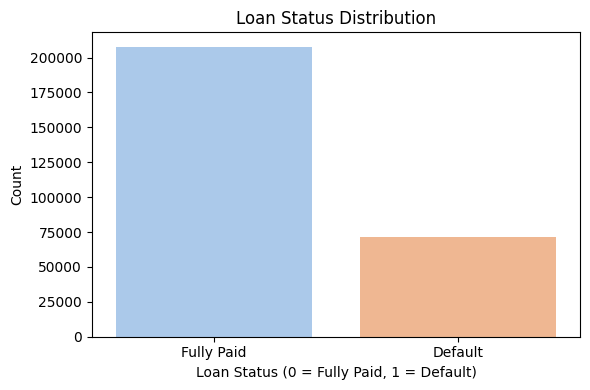

In [12]:
status_counts = df['loan_status'].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=status_counts.index, y=status_counts.values, palette='pastel')
plt.title('Loan Status Distribution')
plt.xlabel('Loan Status (0 = Fully Paid, 1 = Default)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Fully Paid', 'Default'])
plt.tight_layout()
plt.show()

The target variable loan_status is highly imbalanced.

#### Dropping unnecessary or leakage-prone columns
Includes IDs, payment outcomes, descriptions, hardship and settlement info

In [57]:

drop_cols = ['id', 'member_id', 'url',
    'funded_amnt_inv', 'total_pymnt', 'total_pymnt_inv',
    'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
    'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'out_prncp',
    'out_prncp_inv', 'next_pymnt_d',
    'desc', 'title', 'zip_code', 
    'policy_code', 'emp_title']


drop_cols += [col for col in df.columns if col.startswith('hardship_')]
drop_cols += [col for col in df.columns if col.startswith('settlement_')]


df = df.drop(columns=drop_cols)

print("Remaining Columns:", df.shape[1])



Remaining Columns: 53


#### Handling missing values

In [16]:
df.isnull().sum() 

loan_amnt                           0
funded_amnt                         0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_length                      11494
home_ownership                      0
annual_inc                          4
verification_status                 0
issue_d                             0
loan_status                         0
pymnt_plan                          0
purpose                             0
addr_state                          0
dti                                 0
delinq_2yrs                        29
earliest_cr_line                   29
inq_last_6mths                     29
mths_since_last_delinq         153205
mths_since_last_record         242674
open_acc                           29
pub_rec                            29
revol_bal                           0
revol_util                        254
total_acc   

#### Dropping columns with more than 70% missing values
These columns likely lack enough data to be useful for modeling

In [58]:
missing_percentage = df.isnull().sum() / len(df)

cols_to_drop = missing_percentage[missing_percentage > 0.7].index

print("Columns with more than 70% missing values:")
print(list(cols_to_drop))

df= df.drop(columns=cols_to_drop)

Columns with more than 70% missing values:
['mths_since_last_record', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m']


In [18]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'purpose', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim'],
      dtype='object')

 Remaining Columns After Preprocessing

In [59]:

def handle_missing_values(df):
    df = df.copy()

   
    median_fill_cols = [
        'annual_inc', 'dti', 'tot_cur_bal', 'total_rev_hi_lim', 'tot_coll_amt',
        'revol_util', 'total_bal_il', 'il_util', 'all_util', 'max_bal_bc',
        'avg_cur_bal', 'bc_util', 'bc_open_to_buy', 'tot_hi_cred_lim', 'mort_acc',
        'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit'
    ]

    for col in median_fill_cols:
        if col in df.columns:
            df[col] = df[col].fillna(df[col].median())

   
    zero_fill_cols = [
        'collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'delinq_amnt',
        'acc_now_delinq', 'num_accts_ever_120_pd', 'num_tl_90g_dpd_24m',
        'num_tl_30dpd', 'num_tl_120dpd_2m', 'revol_bal_joint',
        'sec_app_inq_last_6mths', 'sec_app_mort_acc', 'sec_app_open_acc',
        'sec_app_revol_util', 'sec_app_open_act_il', 'sec_app_num_rev_accts',
        'sec_app_chargeoff_within_12_mths', 'sec_app_collections_12_mths_ex_med'
    ]

    for col in zero_fill_cols:
        if col in df.columns:
            df[col] = df[col].fillna(0)

   
    categorical_cols = [
        'emp_length', 'home_ownership', 'verification_status', 'purpose',
        'addr_state', 'sub_grade', 'grade', 'pymnt_plan', 'application_type',
        'disbursement_method', 'verification_status_joint', 'debt_settlement_flag'
    ]

    for col in categorical_cols:
        if col in df.columns:
            df[col] = df[col].fillna('Missing')

   
    joint_cols = ['annual_inc_joint', 'dti_joint']
    for col in joint_cols:
        if col in df.columns:
            df[col] = df[col].fillna(0) 
    
    date_cols = ['issue_d', 'last_credit_pull_d', 'earliest_cr_line']
    for col in date_cols:
        if col in df.columns:
            df[col] = df[col].fillna(df[col].mode()[0])

    return df
df = handle_missing_values(df)


In [20]:
df.shape

(279347, 34)

In [60]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object', 'category']).columns


for col in num_cols:
    median = df[col].median()
    df[col].fillna(median, inplace=True) 

for col in cat_cols:
    mode = df[col].mode()[0]
    df[col].fillna(mode, inplace=True)

In [61]:
df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna()

In [62]:

single_unique = [col for col in df.columns if df[col].nunique() == 1]
print("Columns with single unique value:", single_unique)

df = df.drop(columns=single_unique)


Columns with single unique value: []


In [25]:
df.shape

(279347, 34)

In [26]:
df.isnull().sum() 

loan_amnt                     0
funded_amnt                   0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
pymnt_plan                    0
purpose                       0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
mths_since_last_delinq        0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
last_credit_pull_d            0
collections_12_mths_ex_med    0
application_type              0
acc_now_delinq                0
tot_coll

### Outlier Detection and Handling

In [63]:

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"Total Numeric Columns: {len(numeric_cols)}")
print(numeric_cols)

Total Numeric Columns: 20
['loan_amnt', 'funded_amnt', 'int_rate', 'installment', 'annual_inc', 'loan_status', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']


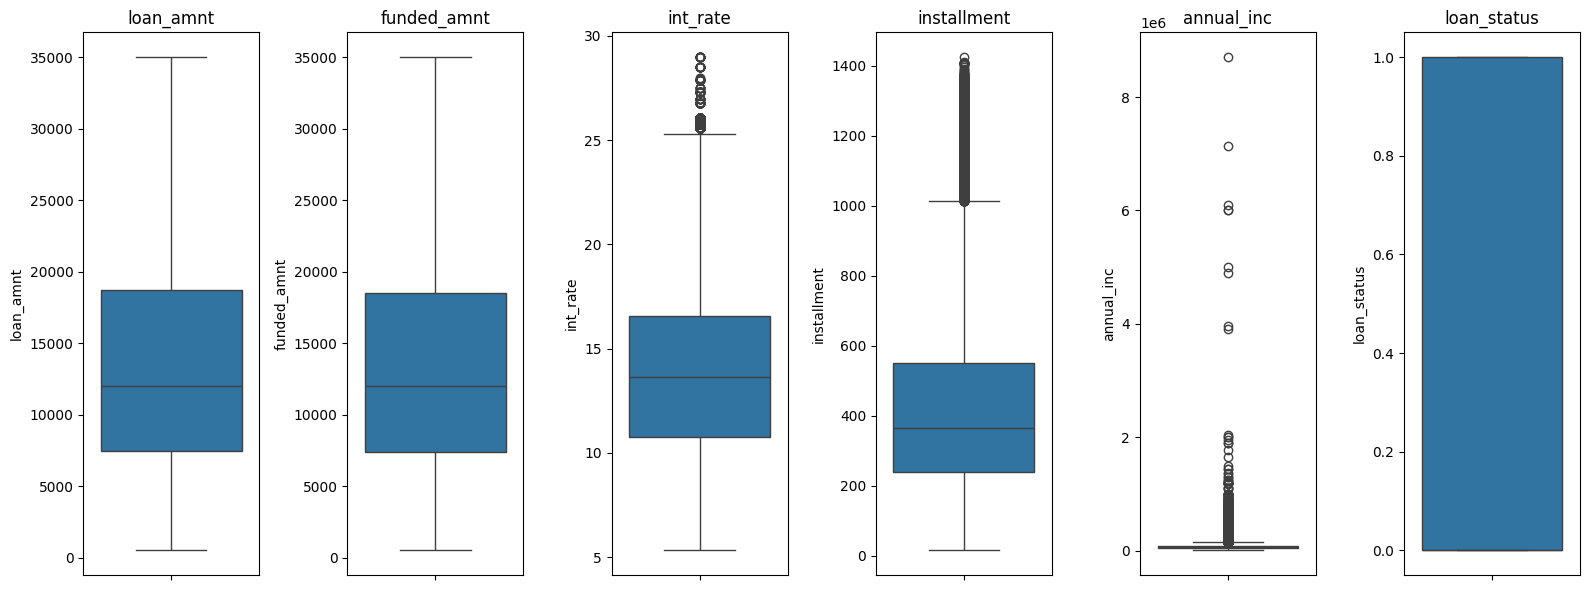

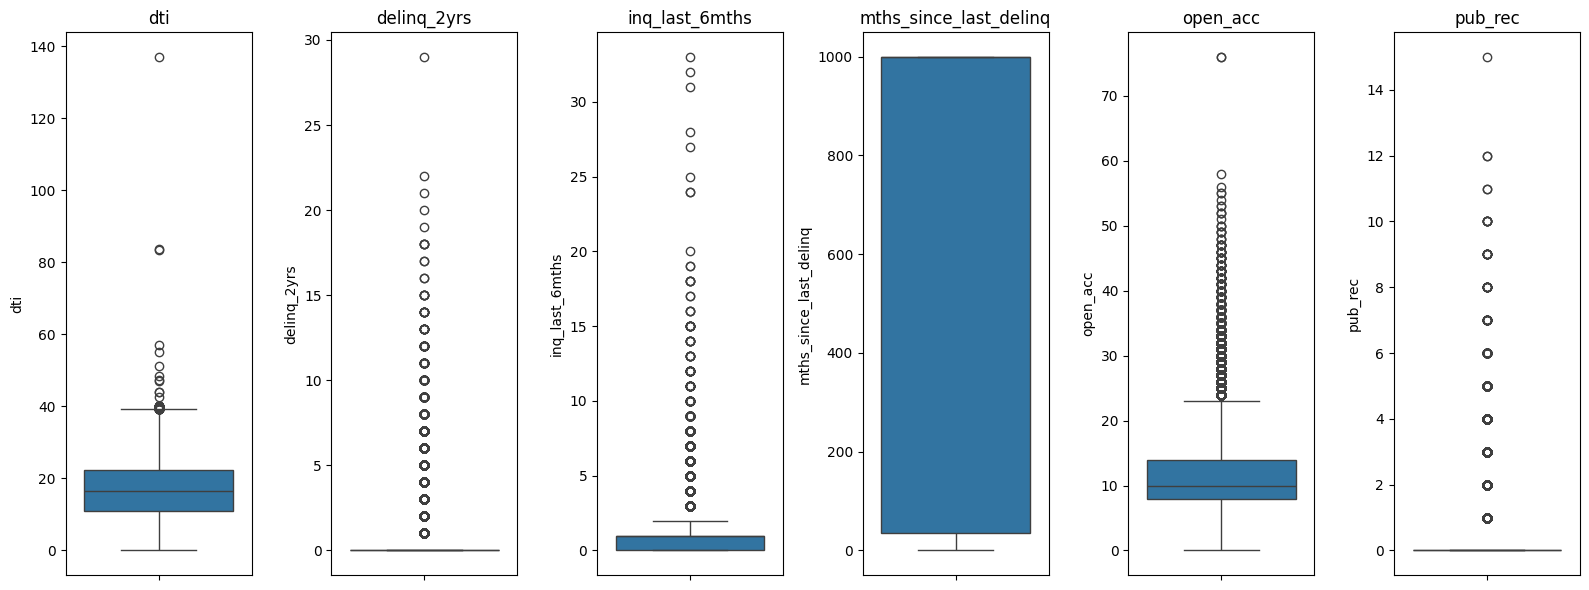

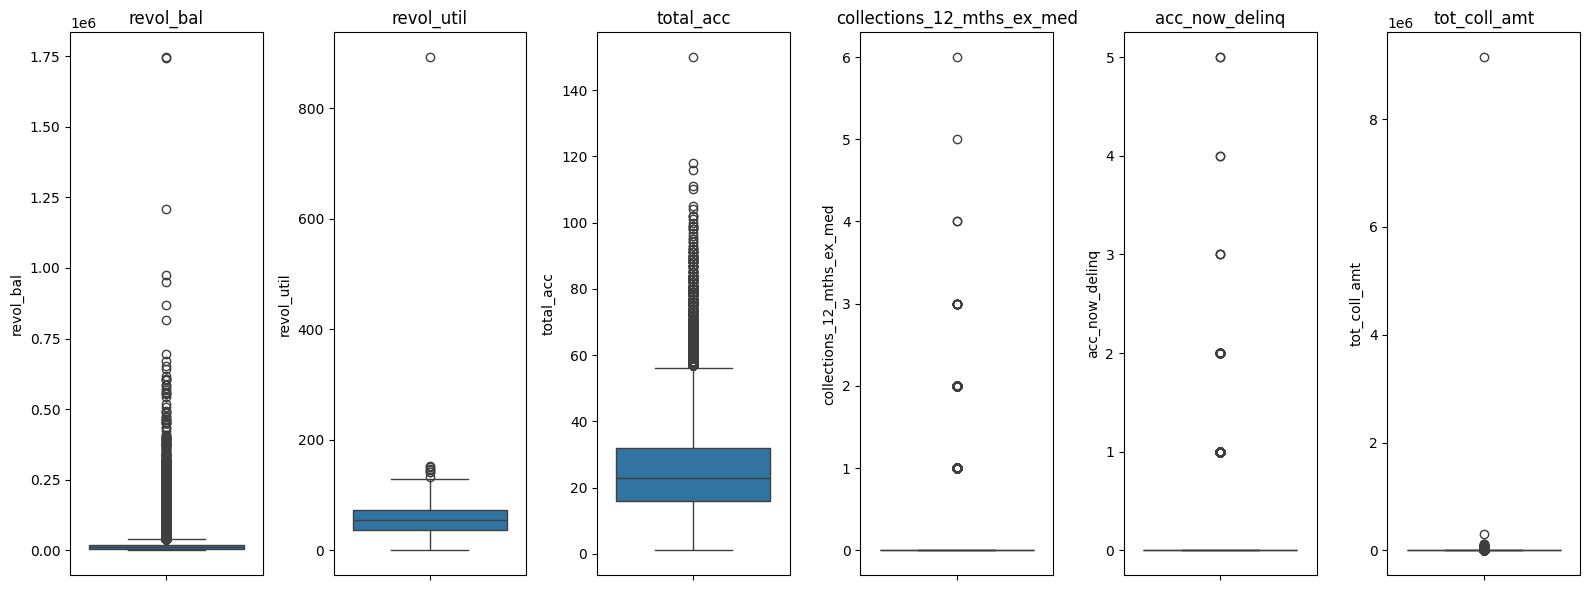

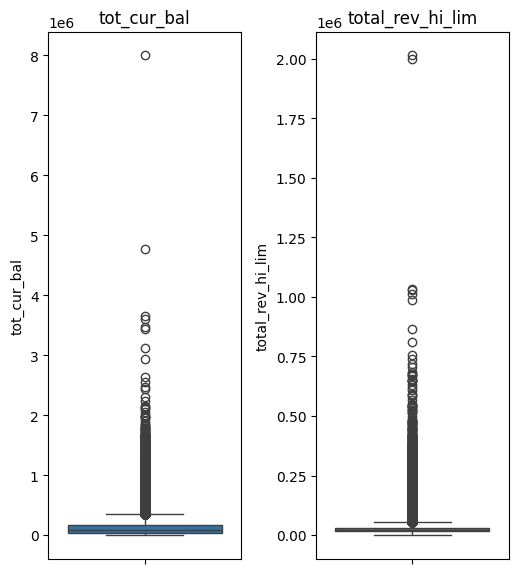

In [14]:


def boxplot_columns(data, columns, batch_size=6):
    for i in range(0, len(columns), batch_size):
        cols = columns[i:i+batch_size]
        plt.figure(figsize=(16, 6))
        for idx, col in enumerate(cols, 1):
            plt.subplot(1, batch_size, idx)
            sns.boxplot(y=data[col])
            plt.title(col)
        plt.tight_layout()
        plt.show()


boxplot_columns(df,numeric_cols , batch_size=6)


In [64]:

cols=[ 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',  'open_acc', 'pub_rec', 'revol_bal', 
      'revol_util', 'total_acc', 'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']

def remove_outliers_quantile(df, columns, lower_quantile=0.01, upper_quantile=0.99):
    df_clean = df.copy()
    for col in columns:
        lower = df_clean[col].quantile(lower_quantile)
        upper = df_clean[col].quantile(upper_quantile)
        df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]
    return df_clean




df=remove_outliers_quantile(df, cols)


To handle extreme values, we removed outliers using the **quantile-based approach**.  
Specifically, we retained data only between the **1st percentile (1%) and 99th percentile (99%)** for selected numerical features.  
This helps prevent skewness from extreme low or high values without affecting most of the data.

In [65]:
df['loan_status'].value_counts()

loan_status
0    168248
1     55148
Name: count, dtype: int64

In [66]:

df['emp_length'] = df['emp_length'].str.extract('(\d+)').astype(float)


In [67]:
df['emp_length'].value_counts()

emp_length
10.0    67987
1.0     33089
2.0     20575
3.0     17980
5.0     16134
4.0     14313
6.0     13257
7.0     12578
8.0     10751
9.0      8614
Name: count, dtype: int64

In [68]:
df = df[(df['revol_util'] >= 0) & (df['revol_util'] <= 100)]



In [69]:
df = df[df['open_acc'] <= df['total_acc']]


In [70]:
df['emp_length']=df['emp_length'].fillna(0)

## Feature Engineering

In [71]:
df['income_to_loan'] = df['annual_inc'] / df['loan_amnt']



In [72]:
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], errors='coerce')
df['credit_length'] = 2025 - df['earliest_cr_line'].dt.year


In [73]:
df['term'] = df['term'].str.extract('(\d+)').astype(int)



In [74]:
df['installment_to_income'] = df['installment'] / (df['annual_inc'] / 12)


In [75]:
def credit_score_bucket(row):
    if (row['credit_length'] > 10) and (row['revol_util'] < 30):
        return 'Excellent'
    elif (row['credit_length'] > 7) and (row['revol_util'] < 50):
        return 'Good'
    elif (row['credit_length'] > 4) and (row['revol_util'] < 70):
        return 'Fair'
    else:
        return 'Poor'


df['credit_score_bucket'] = df.apply(credit_score_bucket, axis=1)

df['credit_score_bucket'].value_counts()


credit_score_bucket
Poor         69452
Fair         66759
Good         54252
Excellent    32933
Name: count, dtype: int64

In [76]:

df = df.drop(columns=['issue_d', 'earliest_cr_line'])


## Feature Selection

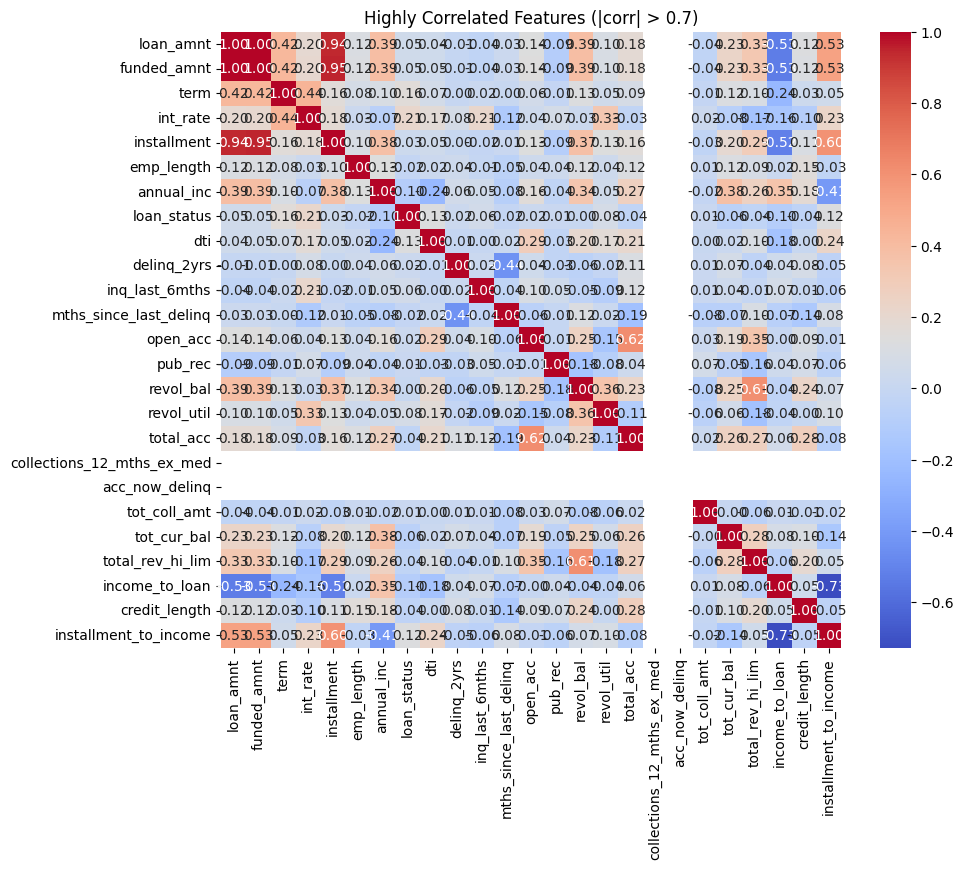

In [55]:
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Highly Correlated Features (|corr| > 0.7)")
plt.show()

In [77]:
columns_to_drop = ['funded_amnt','installment'
]

df= df.drop(columns=columns_to_drop)



To reduce multicollinearity, we dropped features with a **correlation coefficient above 0.9**.  
This helps prevent redundant information and improves model generalization.


In [78]:
df.shape

(223396, 34)

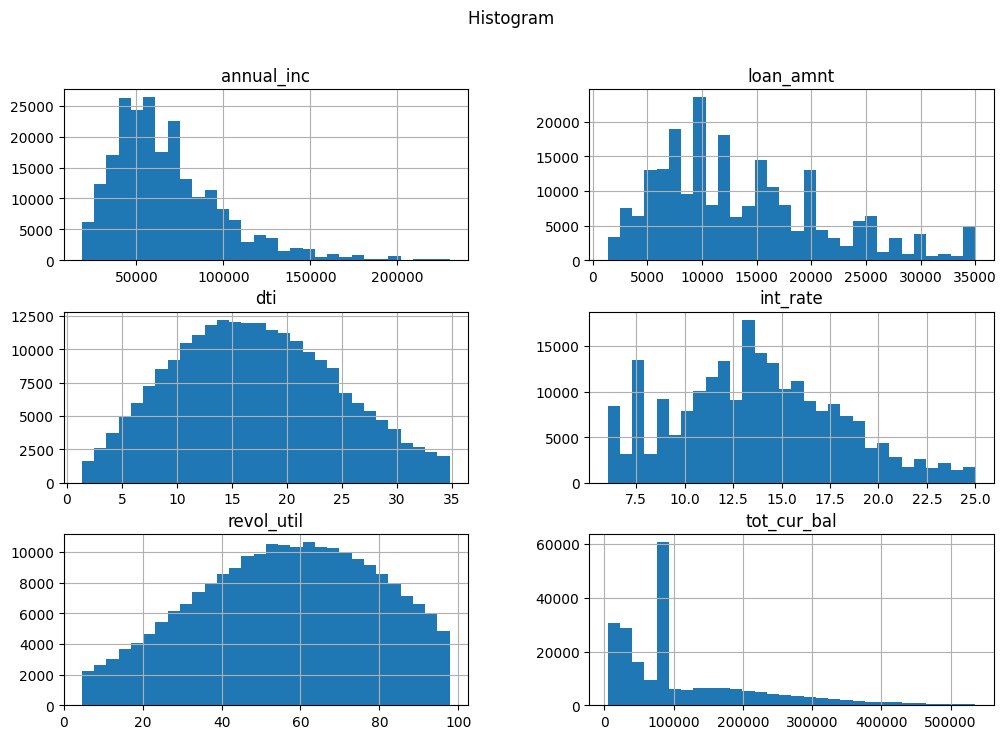

In [95]:
df[['annual_inc', 'loan_amnt', 'dti','int_rate', 'revol_util', 'tot_cur_bal']].hist(bins=30, figsize=(12,8))
plt.suptitle("Histogram ")
plt.show()


In [79]:
x = df.drop('loan_status', axis=1)  
y = df[['loan_status']]                


In [80]:
x.shape

(223396, 33)

In [81]:
y.shape

(223396, 1)

In [82]:
x.to_csv("x_for_targetencoder.csv",index=False)


In [83]:
y.to_csv("y_for_targetencoder.csv",index=False)

## target encoding

In [84]:
cols = x.select_dtypes(include=['category','object']).columns
encoder = ce.TargetEncoder(col)
for col in cols:
    x[col] = encoder.fit_transform(x[col], df['loan_status'])


In [85]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 223396 entries, 0 to 887371
Data columns (total 33 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   223396 non-null  float64
 1   term                        223396 non-null  int32  
 2   int_rate                    223396 non-null  float64
 3   grade                       223396 non-null  float64
 4   sub_grade                   223396 non-null  float64
 5   emp_length                  223396 non-null  float64
 6   home_ownership              223396 non-null  float64
 7   annual_inc                  223396 non-null  float64
 8   verification_status         223396 non-null  float64
 9   pymnt_plan                  223396 non-null  float64
 10  purpose                     223396 non-null  float64
 11  addr_state                  223396 non-null  float64
 12  dti                         223396 non-null  float64
 13  delinq_2yrs        

In [50]:
y.shape

(223396, 1)

In [51]:
y.shape

(223396, 1)

In [52]:
print(y.value_counts())

loan_status
0              168248
1               55148
Name: count, dtype: int64


In [86]:
# Dropped Unnecessary and Data Leakage Columns
x=x.drop(['last_credit_pull_d','addr_state',],axis=1)

### Feature Selection using Random Forest

We used a Random Forest classifier to compute feature importances.  
Top important features were selected based on their contribution to model performance.


In [67]:
model = RandomForestClassifier(random_state=42, n_jobs=-1)
model.fit(x, y)

importances = pd.Series(model.feature_importances_, index=x.columns)
important_features = importances.sort_values(ascending=False).head(30)

print(important_features)


dti                           0.070387
int_rate                      0.065267
income_to_loan                0.062913
revol_bal                     0.062075
installment_to_income         0.061957
revol_util                    0.060967
tot_cur_bal                   0.057835
annual_inc                    0.056500
total_rev_hi_lim              0.053351
total_acc                     0.050330
loan_amnt                     0.049213
credit_length                 0.048828
sub_grade                     0.043145
open_acc                      0.041300
emp_length                    0.032599
mths_since_last_delinq        0.031938
inq_last_6mths                0.023867
grade                         0.022601
purpose                       0.021244
verification_status           0.015340
credit_score_bucket           0.013184
home_ownership                0.011947
tot_coll_amt                  0.010293
term                          0.009362
initial_list_status           0.008647
delinq_2yrs              

In [73]:
important_features=important_features.index.tolist()

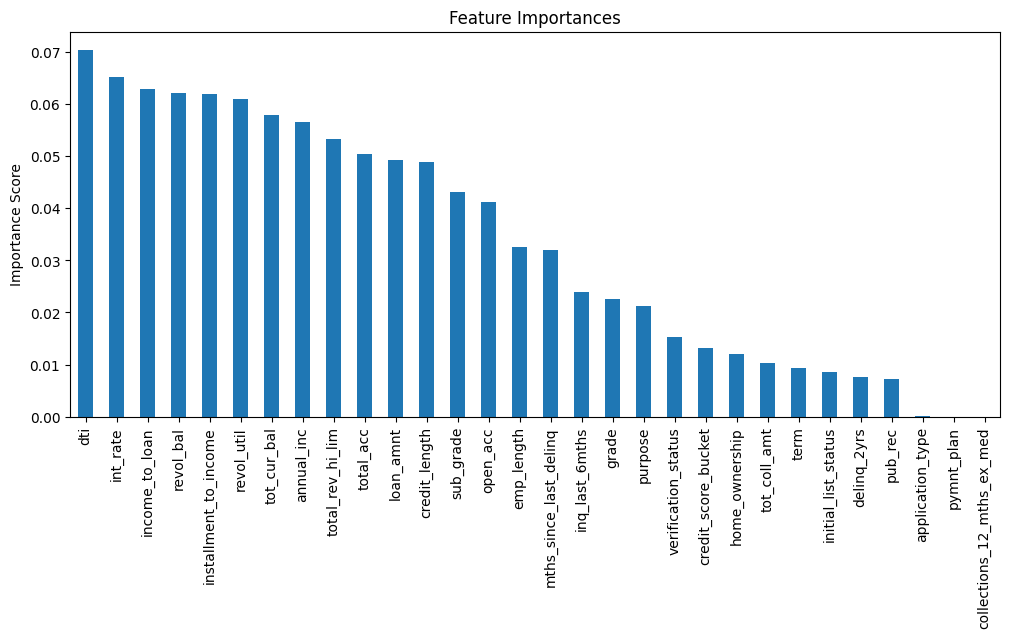

In [70]:
import matplotlib.pyplot as plt

important_features.sort_values(ascending=False).plot(kind='bar', figsize=(12,5))
plt.title("Feature Importances")
plt.ylabel("Importance Score")
plt.show()


In [87]:
features = [
    'dti',
    'int_rate',
    'income_to_loan',
    'revol_bal',
    'installment_to_income',
    'revol_util',
    'tot_cur_bal',
    'annual_inc',
    'total_rev_hi_lim',
    'total_acc',
    'loan_amnt',
    'credit_length',
    'sub_grade',
    'open_acc',
    'emp_length',
    'mths_since_last_delinq',
    'inq_last_6mths',
    'grade',
    'purpose',
    'verification_status',
    'credit_score_bucket',
    'home_ownership',
    'tot_coll_amt',
    'term',
    'initial_list_status',
    'delinq_2yrs',
    'pub_rec'
]


X = x[features]


In [88]:
X.head()

,dti,int_rate,income_to_loan,revol_bal,installment_to_income,revol_util,tot_cur_bal,annual_inc,total_rev_hi_lim,total_acc,...,grade,purpose,verification_status,credit_score_bucket,home_ownership,tot_coll_amt,term,initial_list_status,delinq_2yrs,pub_rec
0,27.65,10.65,4.800000,13648.0,0.081435,83.7,79286.5,24000.0,22200.0,9.0,...,0.178994,0.226481,0.271573,0.282670,0.266888,0.0,36,0.223349,0.0,0.0
3,20.00,13.49,4.920000,5598.0,0.082759,21.0,79286.5,49200.0,22200.0,37.0,...,0.270516,0.279899,0.270483,0.183980,0.266888,0.0,36,0.223349,0.0,0.0
5,11.20,7.90,7.200000,7963.0,0.052153,28.3,79286.5,36000.0,22200.0,12.0,...,0.103752,0.155685,0.270483,0.183980,0.266888,0.0,36,0.223349,0.0,0.0
8,5.55,21.28,7.142857,5210.0,0.045717,32.6,79286.5,40000.0,22200.0,13.0,...,0.474227,0.352222,0.270483,0.228489,0.264692,0.0,60,0.223349,0.0,0.0
10,16.12,14.65,11.076923,4032.0,0.025575,20.6,79286.5,72000.0,22200.0,23.0,...,0.270516,0.252818,0.201560,0.183980,0.264692,0.0,60,0.223349,0.0,0.0


In [89]:
X.shape

(223396, 27)

In [90]:
y.shape

(223396, 1)

In [91]:
X.duplicated().sum()

0

In [86]:
X.to_csv("loan_features.csv", index=False)

y.to_csv("loan_target.csv", index=False)

In [3]:
X=pd.read_csv(r"C:\Users\sanik\OneDrive\loan_features.csv")

In [4]:
y=pd.read_csv(r"C:\Users\sanik\OneDrive\loan_target.csv")

In [5]:
y.value_counts()

loan_status
0              162854
1               50152
Name: count, dtype: int64

## model selection

In [88]:


models = {
    'RandomForest': RandomForestClassifier(max_depth=8, n_jobs=-1, random_state=42),
    'XGBoost': XGBClassifier(max_depth=8, n_jobs=-1, eval_metric='logloss', random_state=42, use_label_encoder=False),
    'LightGBM': LGBMClassifier(max_depth=8, n_jobs=-1, random_state=42),
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=42)
}


results = {
    model_name: {
        'train_accuracy': [],
        'test_accuracy': [],
        'precision': [],
        'recall': [],
        'f1': [],
        'auc': []
    } for model_name in models
}


kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

for fold, (train_index, test_index) in enumerate(kf.split(X, y)):
    print(f"\n  Fold {fold + 1}")

    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    
    ada = ADASYN(random_state=42, n_neighbors=5)
    X_train_res, y_train_res = ada.fit_resample(X_train, y_train)

    print('Before ADASYN:', Counter(y_train))
    print('After ADASYN:', Counter(y_train_res))

    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_res)
    X_test_scaled = scaler.transform(X_test)

    for name, model in models.items():

        
        model.fit(X_train_scaled, y_train_res)

        
        y_pred_test = model.predict(X_test_scaled)
        y_prob_test = model.predict_proba(X_test_scaled)[:, 1]

        y_pred_train = model.predict(X_train_scaled)
        y_prob_train = model.predict_proba(X_train_scaled)[:, 1]

       
        acc_test = accuracy_score(y_test, y_pred_test)
        prec = precision_score(y_test, y_pred_test)
        rec = recall_score(y_test, y_pred_test)
        f1 = f1_score(y_test, y_pred_test)
        auc = roc_auc_score(y_test, y_prob_test)

        
        acc_train = accuracy_score(y_train_res, y_pred_train)

        
        results[name]['train_accuracy'].append(acc_train)
        results[name]['test_accuracy'].append(acc_test)
        results[name]['precision'].append(prec)
        results[name]['recall'].append(rec)
        results[name]['f1'].append(f1)
        results[name]['auc'].append(auc)

        print(
            f" {name} — Train Acc: {acc_train:.4f} | Test Acc: {acc_test:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1: {f1:.4f}, AUC: {auc:.4f}"
        )


results_df = pd.DataFrame({
    model: pd.DataFrame(metrics).mean() for model, metrics in results.items()
}).T

print("\n  Average Metrics Across Folds:")
print(results_df)



  Fold 1
Before ADASYN: Counter({'loan_status': 1})
After ADASYN: Counter({'loan_status': 1})
 RandomForest — Train Acc: 0.8262 | Test Acc: 0.7497, Precision: 0.4423, Recall: 0.2424, F1: 0.3132, AUC: 0.6824
 XGBoost — Train Acc: 0.8954 | Test Acc: 0.7773, Precision: 0.5727, Recall: 0.2132, F1: 0.3107, AUC: 0.7193
[LightGBM] [Info] Number of positive: 103643, number of negative: 108569
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.038721 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6450
[LightGBM] [Info] Number of data points in the train set: 212212, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.488394 -> initscore=-0.046434
[LightGBM] [Info] Start training from score -0.046434
 LightGBM — Train Acc: 0.8545 | Test Acc: 0.7803, Precision: 0.6395, Recall: 0.1533, F1: 0.2473, AUC: 0.7261
 LogisticRegression — Train Acc: 0.6458 | Test Acc: 0.6588, Precision: 0.3658,


We evaluated multiple models — Random Forest, LightGBM, Logistic Regression, and XGBoost — using accuracy, recall, and F1-score.

**XGBoost was selected as the final model** for deployment.


### Hyperparameter Tuning for XGBoost



We performed hyperparameter tuning for the XGBoost model to improve its predictive performance and avoid overfitting.  
The following key parameters were optimized:

- **max_depth**: Controls the complexity of each tree  
- **learning_rate**: Determines how quickly the model adapts to the problem  
- **n_estimators**: Number of boosting rounds  
- **gamma**: Minimum loss reduction to make a split  
- **reg_alpha / reg_lambda**: L1 and L2 regularization to control model complexity  

We used **Optuna**  for automated tuning and selected the best parameters based on cross-validated performance.


In [89]:
def objective(trial):
    param = {
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 5),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 5),
        'random_state': 42,
        'n_jobs': -1,
        'use_label_encoder': False,
        'eval_metric': 'logloss'
    }

    model = XGBClassifier(**param)

    
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    score = cross_val_score(model, X, y, cv=kfold, scoring='accuracy', n_jobs=-1)
    return np.mean(score)


study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)


print('Best Score:', study.best_value)
print('Best Params:', study.best_params)

[I 2025-07-04 06:49:47,706] A new study created in memory with name: no-name-80b5f0d0-af98-4804-bb3a-500cf3233faa
[I 2025-07-04 06:50:16,835] Trial 0 finished with value: 0.778560232782919 and parameters: {'max_depth': 4, 'learning_rate': 0.12013570177402319, 'n_estimators': 694, 'gamma': 3.3304107868649124, 'reg_alpha': 1.6224264294287505, 'reg_lambda': 0.49859694729457504}. Best is trial 0 with value: 0.778560232782919.
[I 2025-07-04 06:50:37,155] Trial 1 finished with value: 0.7826868689263471 and parameters: {'max_depth': 11, 'learning_rate': 0.16087448833996945, 'n_estimators': 104, 'gamma': 3.6843480632401056, 'reg_alpha': 2.2212659797718026, 'reg_lambda': 1.1301160570232356}. Best is trial 1 with value: 0.7826868689263471.
[I 2025-07-04 06:51:24,231] Trial 2 finished with value: 0.7832126781796509 and parameters: {'max_depth': 15, 'learning_rate': 0.06020388454447998, 'n_estimators': 504, 'gamma': 4.973880233875682, 'reg_alpha': 3.039067274212319, 'reg_lambda': 1.864720520216129

Best Score: 0.7835600830160849
Best Params: {'max_depth': 13, 'learning_rate': 0.010586732999373287, 'n_estimators': 565, 'gamma': 3.320126826692539, 'reg_alpha': 1.4742156830740683, 'reg_lambda': 4.273188524552188}


### XGBoost Model Building


In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [59]:
X_train.shape

(170404, 27)

In [91]:

pipeline1 = Pipeline([
    ('scaler', StandardScaler()),
    ('adasyn', ADASYN(random_state=42)),
    ('model', XGBClassifier(max_depth= 13, learning_rate= 0.010586732999373287, n_estimators= 565,
                             gamma= 3.320126826692539,reg_alpha=1.4742156830740683, reg_lambda=4.273188524552188


    ))
])

In [92]:
pipeline1.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('adasyn', ADASYN(random_state=42)),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, feature_weights=None,
                               gamma=3.32012682..., grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None,
                               learning_rate=0.010586732999373287, max_bin=None,
                               max_cat_threshold=None, max_cat_to_onehot=None,
                               max_delta_step=None, max_depth=13,
                               max_leaves=None, min_child_weight=None,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=565,
                               n_jobs=None, num_parallel_tree=None, ...))])

In [93]:
y_pred_train = pipeline1.predict(X_train)
accuracy=accuracy_score(y_train,y_pred_train)
accuracy

0.8167093884679305

In [94]:
y_pred = pipeline1.predict(X_test)
y_prob = pipeline1.predict_proba(X_test)[:, 1]


In [99]:
accuracy=accuracy_score(y_test,y_pred)
print('accuracy',accuracy)
roc_auc=roc_auc_score(y_test,y_prob)
print('roc_auc',roc_auc)
print(classification_report(y_test,y_pred))

accuracy 0.7820202247824005
roc_auc 0.7309742962422184
              precision    recall  f1-score   support

           0       0.80      0.96      0.87     54284
           1       0.61      0.20      0.30     16718

    accuracy                           0.78     71002
   macro avg       0.70      0.58      0.59     71002
weighted avg       0.75      0.78      0.74     71002



### XGBoost Model with Scale_Pos_Weight for Cost-Sensitive Learning

In loan default prediction, minimizing false negatives is crucial because missing a defaulter leads to financial loss.  
To address this, we used the `scale_pos_weight` parameter in XGBoost, which adjusts the balance between positive (defaults) and negative (non-defaults) classes.

scale_pos_weight = number of negative samples / number of positive samples

In [107]:
pipeline2 = Pipeline([
    ('scaler', StandardScaler()),
    ('adasyn', ADASYN(random_state=42)),
    ('model', XGBClassifier(max_depth= 13, learning_rate= 0.010586732999373287, n_estimators= 565,
                             gamma= 3.320126826692539,reg_alpha=1.4742156830740683, reg_lambda=4.273188524552188,
                            scale_pos_weight=3.247
                        


    ))
])

In [108]:
pipeline2.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('adasyn', ADASYN(random_state=42)),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, feature_weights=None,
                               gamma=3.32012682..., grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None,
                               learning_rate=0.010586732999373287, max_bin=None,
                               max_cat_threshold=None, max_cat_to_onehot=None,
                               max_delta_step=None, max_depth=13,
                               max_leaves=None, min_child_weight=None,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=565,
                               n_jobs=None, num_parallel_tree=None, ...))])

In [121]:
y_pred_train = pipeline2.predict(X_train)
accuracy=accuracy_score(y_train,y_pred_train)
accuracy

0.7914847469085378

In [110]:
y_pred = pipeline2.predict(X_test)
y_prob = pipeline2.predict_proba(X_test)[:, 1]

In [111]:
accuracy=accuracy_score(y_test,y_pred)
print('accuracy',accuracy)
roc_auc=roc_auc_score(y_test,y_prob)
print('roc_auc',roc_auc)
print(classification_report(y_test,y_pred))

accuracy 0.675713360187037
roc_auc 0.7255228103468876
              precision    recall  f1-score   support

           0       0.86      0.69      0.76     54284
           1       0.39      0.64      0.48     16718

    accuracy                           0.68     71002
   macro avg       0.62      0.66      0.62     71002
weighted avg       0.75      0.68      0.70     71002



### Stacking Classifier Model

We used a Stacking Classifier to combine the strengths of multiple models like XGBoost, LightGBM, and Logistic Regression.  
This ensemble method helps improve overall prediction accuracy by learning from the outputs of base models.


In [12]:
xgb = XGBClassifier(
    n_estimators=300,
    max_depth=13,
    learning_rate=0.8254,
    subsample=0.77,
    colsample_bytree=0.802,
    gamma=1.5165,
    reg_alpha=2.96,
    reg_lambda=0.69,
    scale_pos_weight=3.61,  
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)


lgbm = LGBMClassifier(
    n_estimators=300,
    max_depth=13,
    learning_rate=0.8254,
    subsample=0.77,
    colsample_bytree=0.802,
    reg_alpha=2.96,
    reg_lambda=0.69,
    class_weight='balanced',  
    random_state=42
)


cat = CatBoostClassifier(
    iterations=300,
    depth=13,
    learning_rate=0.8254,
    l2_leaf_reg=3,
    verbose=0,
    random_state=42
)




lr = LogisticRegression(
    max_iter=1000,
    C=1.0,
    class_weight='balanced',
    random_state=42
)


stack = StackingClassifier(
    estimators=[
        ('xgb', xgb),
        ('lgbm', lgbm),
        ('cat', cat),
        ('lr', lr)
    ],
    final_estimator=LogisticRegression(
        C=0.5, 
        max_iter=1000, 
        class_weight='balanced', 
        random_state=42
    ),
    stack_method='predict_proba',
    passthrough=True,
    cv=5,
    n_jobs=-1
)

pipeline_stack = Pipeline([
    ('scaler', StandardScaler()),
    ('oversample', ADASYN(random_state=42)),
    ('stacking', stack)
])


In [16]:
pipeline_stack.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('oversample', ADASYN(random_state=42)),
                ('stacking',
                 StackingClassifier(cv=5,
                                    estimators=[('xgb',
                                                 XGBClassifier(base_score=None,
                                                               booster=None,
                                                               callbacks=None,
                                                               colsample_bylevel=None,
                                                               colsample_bynode=None,
                                                               colsample_bytree=0.802,
                                                               device=None,
                                                               early_stopping_rounds=None,
                                                               enable_categorical=False,
                                                               eval_metric='logloss',...
                                                                reg_alpha=2.96,
                                                                reg_lambda=0.69,
                                                                subsample=0.77)),
                                                ('cat',
                                                 <catboost.core.CatBoostClassifier object at 0x0000020FF53D1520>),
                                                ('lr',
                                                 LogisticRegression(class_weight='balanced',
                                                                    max_iter=1000,
                                                                    random_state=42))],
                                    final_estimator=LogisticRegression(C=0.5,
                                                                       class_weight='balanced',
                                                                       max_iter=1000,
                                                                       random_state=42),
                                    n_jobs=-1, passthrough=True,
                                    stack_method='predict_proba'))])

In [18]:
y_pred = pipeline_stack.predict(X_test)
y_prob = pipeline_stack.predict_proba(X_test)[:, 1]

In [19]:
accuracy=accuracy_score(y_test,y_pred)
print('accuracy',accuracy)
roc_auc=roc_auc_score(y_test,y_prob)
print('roc_auc',roc_auc)
print(classification_report(y_test,y_pred))

accuracy 0.7593305478616027
roc_auc 0.7173426754975374
              precision    recall  f1-score   support

           0       0.82      0.88      0.85     32576
           1       0.48      0.36      0.41     10026

    accuracy                           0.76     42602
   macro avg       0.65      0.62      0.63     42602
weighted avg       0.74      0.76      0.75     42602



#### Precision-Recall Curve

In [20]:
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
avg_precision = average_precision_score(y_test, y_prob)

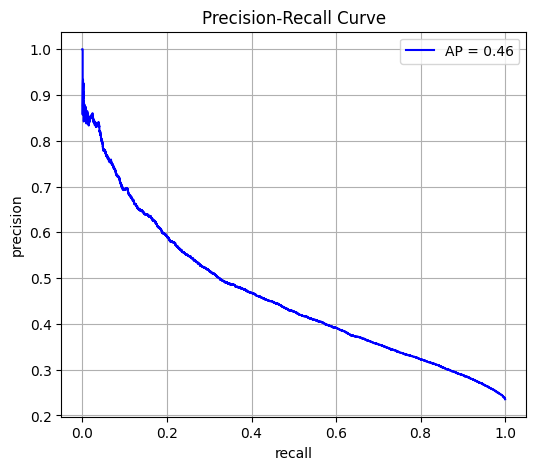

In [21]:
plt.figure(figsize=(6, 5))
plt.plot(recall, precision, color='blue', label=f'AP = {avg_precision:.2f}')
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()

#### Receiver Operating Characteristic (ROC) Curve

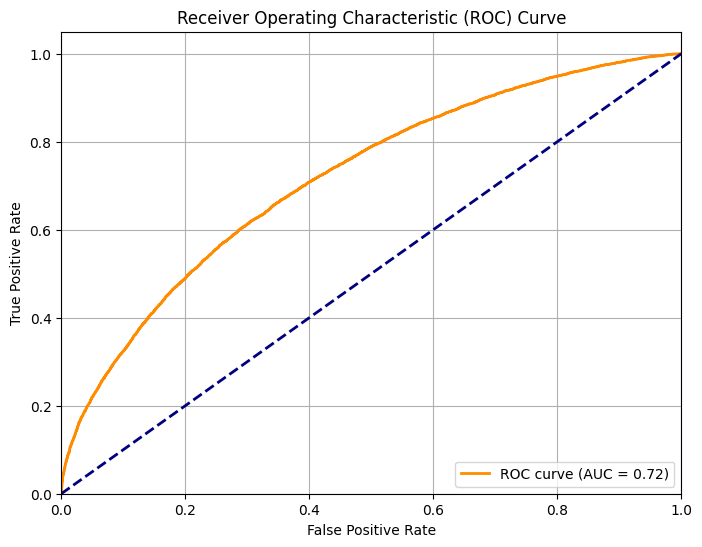

In [22]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

roc_auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()

### Model Explainability with SHAP and MLflow

SHAP was used to explain the predictions of the stacked model by showing feature contributions.  
The SHAP summary plots were saved and logged to MLflow for tracking model interpretability alongside performance metrics.


In [62]:
mlflow.set_experiment("ml-loan-default")
mlflow.set_tracking_uri("http://127.0.0.1:5000/")

Accuracy: 0.7593305478616027
Precision: 0.4847507725379551
Recall: 0.35986435268302414
F1 Score: 0.41307458927242546
AUC: 0.7173426754975374


2025/07/08 06:44:32 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/07/08 06:44:42 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Model saved at: runs:/4c02685e1c46470da7cfdf200e9a2571/LoanDefault_Model
Generating SHAP plot for XGBoost...
SHAP logging failed: name 'os' is not defined
🏃 View run LoanDefault_StackedPipeline1 at: http://127.0.0.1:5000/#/experiments/779749110517654145/runs/4c02685e1c46470da7cfdf200e9a2571
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/779749110517654145


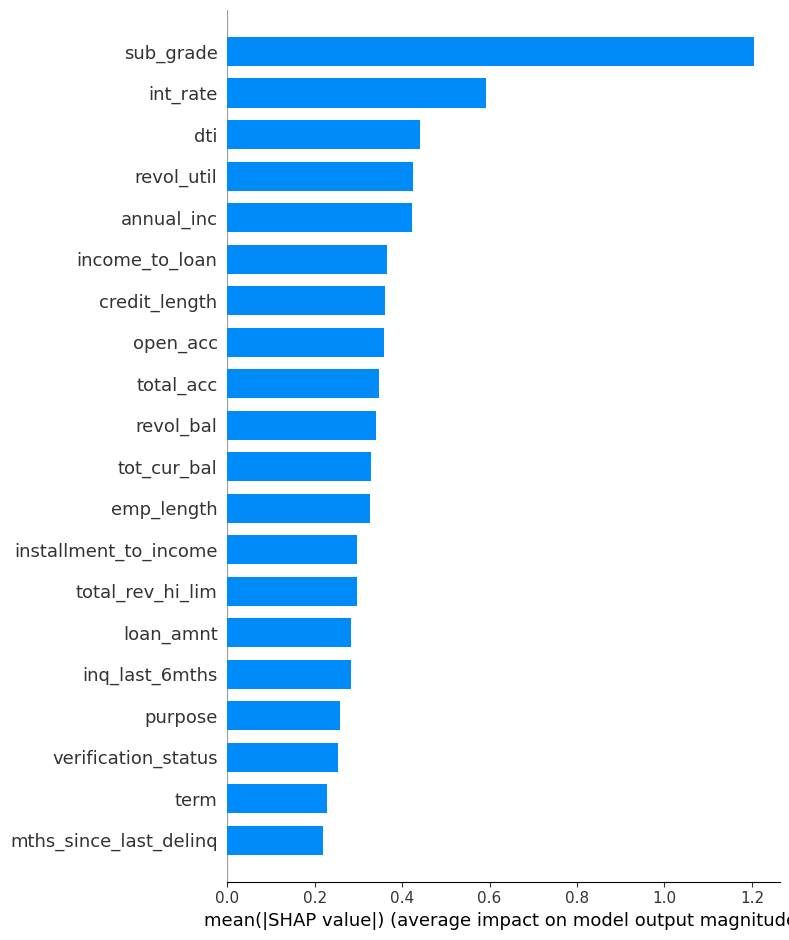

In [63]:

with mlflow.start_run(run_name="LoanDefault_StackedPipeline1") as run:

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)

   
    print(f"Accuracy: {acc}")
    print(f"Precision: {prec}")
    print(f"Recall: {rec}")
    print(f"F1 Score: {f1}")
    print(f"AUC: {auc}")

   
    mlflow.set_tag("model_type", "StackingClassifier with ADASYN and StandardScaler")
    mlflow.log_param("scaler", "StandardScaler")
    mlflow.log_param("sampler", "ADASYN")
    mlflow.log_param("meta_model", "LogisticRegression")


    mlflow.log_param("xgb_n_estimators", 300)
    mlflow.log_param("xgb_max_depth", 13)
    mlflow.log_param("xgb_learning_rate", 0.8254)
    mlflow.log_param("xgb_subsample", 0.77)
    mlflow.log_param("xgb_colsample_bytree", 0.802)
    mlflow.log_param("xgb_gamma", 1.5165)
    mlflow.log_param("xgb_reg_alpha", 2.96)
    mlflow.log_param("xgb_reg_lambda", 0.69)
    mlflow.log_param("xgb_scale_pos_weight", 3.245)

    mlflow.log_param("lgbm_class_weight", "balanced")
    mlflow.log_param("cat_l2_leaf_reg", 3)
    mlflow.log_param("stack_final_lr_C", 0.5)

 
    mlflow.log_metric("accuracy", acc)
    mlflow.log_metric("precision", prec)
    mlflow.log_metric("recall", rec)
    mlflow.log_metric("f1_score", f1)
    mlflow.log_metric("auc", auc)

  
    mlflow.sklearn.log_model(pipeline_stack, artifact_path="LoanDefault")

  
    run_id = run.info.run_id
    model_uri = f"runs:/{run_id}/LoanDefault"
    print("Model saved at:", model_uri)

  
    try:
        print("Generating SHAP plot for XGBoost...")
        stacking_model = pipeline_stack.named_steps['stacking']
        xgb_model = dict(stacking_model.named_estimators_)['xgb']

        X_test_scaled_array = pipeline_stack.named_steps['scaler'].transform(X_test)
        X_test_scaled = pd.DataFrame(X_test_scaled_array, columns=X_test.columns)

        explainer = shap.TreeExplainer(xgb_model)
        shap_values = explainer.shap_values(X_test_scaled)
        
        shap.summary_plot(shap_values, X_test_scaled, show=False, plot_type="bar")
        shap_plot_path = "shap_summary_bar.png"
        plt.tight_layout()
        plt.savefig(shap_plot_path)
        mlflow.log_artifact(shap_plot_path)
        os.remove(shap_plot_path)

        shap.summary_plot(shap_values, X_test_scaled, show=False)
        shap_plot_path2 = "shap_summary.png"
        plt.tight_layout()
        plt.savefig(shap_plot_path2)
        mlflow.log_artifact(shap_plot_path2)
        os.remove(shap_plot_path2)

    except Exception as e:
        print("SHAP logging failed:", e)


In [27]:
print(acc)
print(auc)
print(classification_report(y_test,y_pred))

0.7593305478616027
0.7173426754975374
              precision    recall  f1-score   support

           0       0.82      0.88      0.85     32576
           1       0.48      0.36      0.41     10026

    accuracy                           0.76     42602
   macro avg       0.65      0.62      0.63     42602
weighted avg       0.74      0.76      0.75     42602



### Model Saving with Joblib

In [65]:
import joblib

joblib.dump(pipeline_stack, "loan_model.pkl")


['loan_model.pkl']